# Exercise 11 - Solutions

### 1: Unbiased estimation 
#### a) 

If $\frac{1}{n}\sum_i x_i$ is an unbiased for the $E(X)$, then:

$$
E\left( \frac{1}{n}\sum_i x_i\right)=E(X)=\mu
$$


By linearity of expectations, we have:

\begin{align}
 E\left( \frac{1}{n}\sum_i x_i\right) &=\frac{1}{n}\sum_i E(x_i)\\
 &= \frac{1}{n}\sum_i \mu\\
 &= \frac{1}{n}n \mu\\
 &=\mu
\end{align}

Thus the sample mean is an unbiased estimator of $\mu$.

#### b)

In [1]:
import numpy as np

In [2]:
def simul(n,nreps,μ,λ):
    """
    Function to simulate bias of median estimator.
    
    Parameters
    ----------
        n : integer
            number of draws per replication
        nreps : integer
            number of replications/simulation samples
        μ : float
            mean of normal distribution
        λ : float
            parameter of exponential distribution
    """
    
    # draw simulation samples 
    draws_N = μ + np.random.randn(n,nreps)
    draws_exp = np.random.exponential(λ,[n,nreps])
    
    # compute and display theoretical median, estimated median, and estiamtion error
    print('Theoretical Median (Normal): ' + str(μ))
    print('Simulated Median (Normal): ' + str(np.mean(np.median(draws_N,axis=0))))
    print('Estimation Error (Normal): ' + str(np.mean(np.median(draws_N,axis=0)-μ)))
    
    print('\nTheoretical Median (Exponential): ' + str((1/λ)*np.log(2)))
    print('Simulated Median (Exponential): ' + str(np.mean(np.median(draws_exp,axis=0))))
    print('Estimation Error (Exponential): ' + str(np.mean(np.median(draws_exp,axis=0)-(1/λ)*np.log(2))))

    

Let's now run our simulation for a sequence of 1000 draws and 10000 replications with $\mu=1$ and $\lambda=2$.

In [3]:
simul(1000,10000,1,2)

Theoretical Median (Normal): 1
Simulated Median (Normal): 1.000102791790256
Estimation Error (Normal): 0.00010279179025597019

Theoretical Median (Exponential): 0.34657359027997264
Simulated Median (Exponential): 1.3862798509738625
Estimation Error (Exponential): 1.0397062606938898


As we can see, the median is biased for the exponential distribution.

#### c) 

As suggested by the exercise, we use integration by parts. The formula for integration by parts is given by (written compactly):

\begin{align}
\int x\cdot dv = x\cdot v - \int v\cdot dx
\end{align}

We can now substitute:
\begin{align}
x &= ln(u) \\
dx &= \frac{1}{u}\\
dv &= 1 \\
v &= u
\end{align}

Thus (disregarding the constant):

\begin{align}
\int x\cdot dv &= u\cdot ln(u)-\int u\cdot\frac{1}{u} du \\
&= u\cdot ln(u)-u\\
&= u(ln(u)-1)
\end{align}

Recall that the exercise asks for $-\int log(u)du$:

$$
\int x\cdot dv = u(1-ln(u))
$$


#### d) 

### 2: The unbiased sample variance estimator
#### a)

$$(X_{i}-\frac{1}{n}\sum_{i=1}^{n}X_{i})^{2}=(X_{i}-\frac{1}{n}\sum_{i=1}^{n}X_{i})(X_{i}-\frac{1}{n}\sum_{i=1}^{n}X_{i}) = X_{i}^{2}-\frac{2}{n}X_{i}\left(\sum_{i=1}^{n}X_{i}\right)+\frac{1}{n^{2}}\left(\sum_{i=1}^{n}X_{i}\right)^{2}$$

#### b)
\begin{align}
(n-1)S^2 &= \sum_{i=1}^n (X_i - \overline{X})^2\\
& = \sum_{i=1}^n X_{i}^{2}-\frac{2}{n} \sum_{i=1}^n X_{i}\left(\sum_{i=1}^{n}X_{i}\right)+\frac{1}{n^{2}}n \left(\sum_{i=1}^{n}X_{i}\right)^{2} \\
& = \sum_{i=1}^n X_{i}^{2}-\frac{2}{n} \left(\sum_{i=1}^{n}X_{i}\right)^2+\frac{1}{n} \left(\sum_{i=1}^{n}X_{i}\right)^{2} \\
& = \sum_{i=1}^n X_{i}^{2}-\frac{1}{n} \left(\sum_{i=1}^{n}X_{i}\right)^2
\end{align}

#### c) 

\begin{align}
(\sum_{i=1}^{n}X_{i})^{2}&=(\sum_{i=1}^{n}X_{i})(\sum_{i=1}^{n}X_{i})\\
&=\sum_{i=1}^{n}X_{i}\sum_{j=1}^{n}X_{j}\\
&=\sum_{i=1}^{n}\sum_{j=1}^{n}X_{i}X_{j}
\end{align}

Since  this is just a sum of all combinations $X_iX_j$, we can write

\begin{align}
\sum_{i=1}^{n}\sum_{j=1}^{n}X_{i}X_{j}=\sum_{i=1}^{n}X_{i}^{2}+\sum_{i=1}^{n}\sum_{j\neq i}X_{i}X_{j}
\end{align}


#### d) 

\begin{align}
E[\frac{1}{n}\sum_{i=1}^n X_{i}^{\alpha}]&= \frac{1}{n} n E[X_{i}^{\alpha}]\\
&= E[X_{i}^{\alpha}]
\end{align}

thus we have that $E[\sum_{i=1}^{n}X_{i}^{2}] = nE[X_{i}^{2}]$. Moreover, $E[\sum_{i=1}^{n}\sum_{j\neq i}X_{i}X_{j}] = 0$, because of independence and because we assume $E(X_i)=0$



#### e)

Putting it all together, we have:
\begin{align}
(n-1)S^2 &= \sum_{i=1}^n X_{i}^{2}-\frac{1}{n} \left(\sum_{i=1}^{n}X_{i}\right)^2 \\
&= \sum_{i=1}^n X_{i}^{2} - \frac{1}{n}\sum_{i=1}^{n}X_{i}^{2} -\frac{1}{n} \sum_{i=1}^{n}\sum_{j\neq i}X_{i}X_{j}\\
&= \frac{n-1}{n}\sum_{i=1}^n X_{i}^{2} -\frac{1}{n} \sum_{i=1}^{n}\sum_{j\neq i}X_{i}X_{j}
\end{align}

Thus

\begin{align}
E((n-1)S^2) &= E\left( \frac{n-1}{n}\sum_{i=1}^n X_{i}^{2} -\frac{1}{n} \sum_{i=1}^{n}\sum_{j\neq i}X_{i}X_{j}\right)\\
(n-1)E(S^2) &= \frac{n-1}{n}n E(X^{2}) - \frac{1}{n} n (n-1) E(X)^2 \\
(n-1)E(S^2) &= (n-1)E(X^{2}) -  (n-1)E(X)^2\\
E(S^2) &= E(X^{2}) -  E(X)^2
\end{align}

which is equal to $Var(X)$.

### 3: Adjusted $R^2$

#### a) Plotting the function

In [4]:
import matplotlib.pyplot as plt

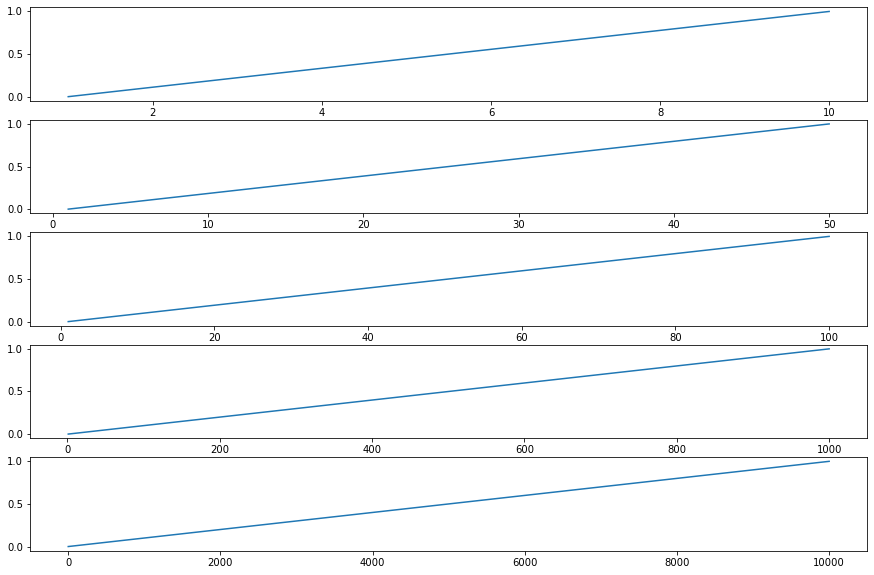

In [5]:
vals = [10,50,100,1000,10000]

def f(k,n):
    return (k-1)/(n-1)

fig, ax = plt.subplots(5,1,figsize=(15,10))

for i,a in enumerate(vals):
    ax[i].plot(np.arange(a)+1,f(np.arange(a)+1,a))

For all values $n$ and $k$, $E(R^2)$ is a linearly increasing function between 0 and 1. Increasing the number of predictors also increases the $R^2$.

#### b)

We have that:
$$R^2 \sim \textrm{Beta}\left(\frac{k-1}{2},\frac{n-k}{2}\right),$$

The variance of this beta distribution is:

$$
\frac{\frac{k-1}{2}\frac{n-k}{2}}{\left(\frac{k-1}{2}+\frac{n-k}{2}\right)^2\left(\frac{k-1}{2}+\frac{n-k}{2}+1\right)}
$$

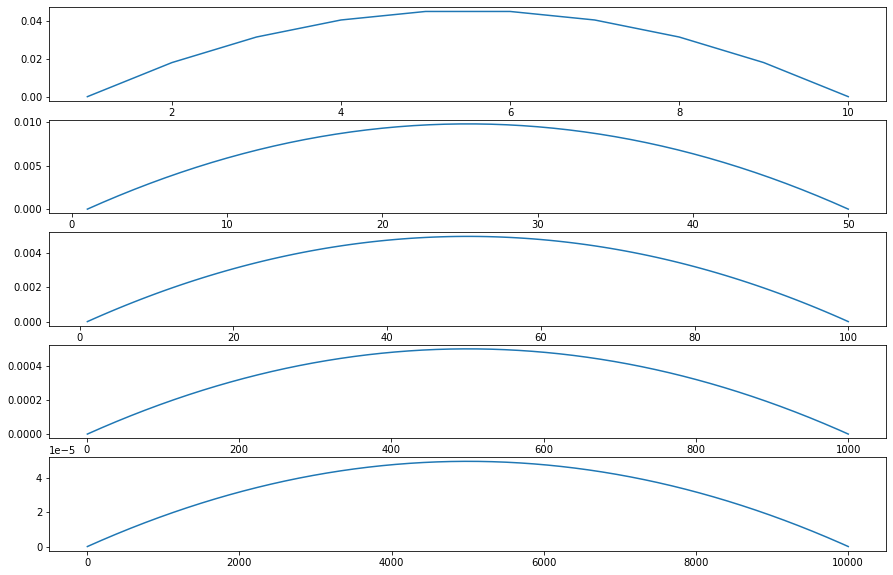

In [6]:
# define the function for the variance
def g(k,n):
    a = (k-1)/2
    b = (n-k)/2
    
    return a*b/((a+b)**2*(a+b+1))

fig, ax = plt.subplots(5,1,figsize=(15,10))

for i,a in enumerate(vals):
    ax[i].plot(np.arange(a)+1,g(np.arange(a)+1,a))

#### c)

In [7]:
import statsmodels.formula.api as smf


In [8]:
def rsqs(n, p, n_reps):
    """ document! """
    
    x = np.random.normal(0, 1, (n, p))
    yy = np.random.normal(3, 2, (n, n_reps))
    
    def func1d(y,x):

        fit = smf.ols("y ~ x", data = {}).fit() 
        return fit.rsquared, fit.rsquared_adj

    rsqs, rsqs_adj = np.apply_along_axis(func1d = lambda y: func1d(y,x), axis = 0, arr = yy)
    
    return rsqs, rsqs_adj

#### d)

In [9]:
def plot(rsq, rsq_adj):
    fig, ax = plt.subplots(2,1)

    ax[0].hist(rsq)
    ax[1].hist(rsq_adj)

#### e)

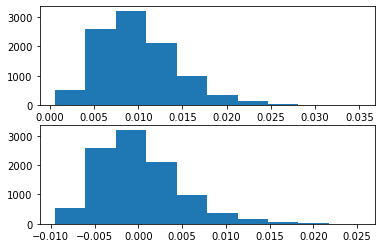

In [10]:
rsq, rsq_adj = rsqs(1000, 10, 10000)

plot(rsq, rsq_adj)

In [11]:
np.mean(rsq_adj)

3.531499189222701e-05

The adjusted $R^2$ appears to be unbiased.

#### f)

In [12]:
def rsqs2(n, p, n_reps, beta):
    """ document! """
    
    x = np.random.normal(0, 1, (n, p))
    yy = (x@beta)[:,None] + np.random.normal(3, 2, (n, n_reps))
        
    def func1d(y,x):

        fit = smf.ols("y ~ x", data = {}).fit() 
        return fit.rsquared, fit.rsquared_adj

    rsqs, rsqs_adj = np.apply_along_axis(func1d = lambda y: func1d(y,x), axis = 0, arr = yy)
    
    return rsqs, rsqs_adj

In [13]:
beta = np.linspace(0.1,0.9,10)

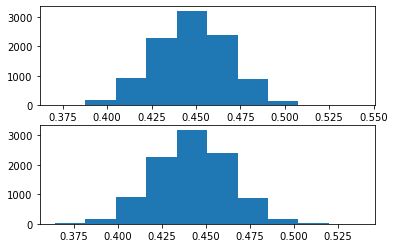

In [14]:
rsq, rsq_adj = rsqs2(1000, 10, 10000, beta)

plot(rsq, rsq_adj)

With all coefficients unequal to 0, the simulation results in the roughly same histogram. 